<h1 align="center">Changes in sentinel measures of primary care activity during the pandemic</h1>

The purpose of this notebook is to provide measures of overall activity at the practice level during the pandemic.

The following sentinel measures are provided:
* [Systolic BP](#systolic_bp)
* [QRISK](#qrisk)
* [Cholesterol](#cholesterol)
* [Bilirubin](#bilirubin)
* [Serum TSH](#serum_tsh)
* [RBC/FBC](#rbc_fbc)
* [HBa1c](#hba1c)
* [Serum Sodium](#serum_sodium)
* [Asthma](#asthma)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ebmdatalab import charts
from IPython.display import HTML
from collections import Counter
from numpy import nan
from decimal import Decimal


%matplotlib inline

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [7]:

HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
code_df = pd.read_csv('../data/code_dictionary.csv')
example_code_df = pd.DataFrame(data=[["A", "Description A here"], ["B", "Description B here"]], columns=["first_digits", "Description"])

sentinel_measures = ["systolic_bp", "qrisk", "cholesterol", "bilirubin", "serum_tsh", "rbc_fbc", "hba1c", "serum_sodium", "asthma"]
sentinel_measures_test = ["sentinel_measure_x"]

def convert_datetime(df):
    df['date'] = pd.to_datetime(df['date'])
    
def drop_irrelevant_practices(df):
    #drop practices that do not use the code
    mean_value_df = df.groupby("practice")["value"].mean().reset_index()
   
    practices_to_drop = list(mean_value_df['practice'][mean_value_df['value'] ==0])
    
    #drop
    df = df[~df['practice'].isin(practices_to_drop)]
   
    return df
  
    

data_dict = {}

for measure in sentinel_measures_test:
    data_dict[measure] = pd.read_csv(f'../output/measure_{measure}.csv')
    convert_datetime(data_dict[measure])
    
def get_child_codes(df):
    codes = df['event_code']
    code_dict = Counter(codes)
    del code_dict[nan]
    return dict(code_dict)

def create_child_table(df, code_df, code, child_codes):
    #pass in df from data_dict
    #code df contains first digits and descriptions
    
    #get codes counts
    code_dict = get_child_codes(df)
    
    #make df

    df = pd.DataFrame.from_dict(child_codes, orient="index", columns=["Events (thousands)"])
    df['Code'] = df.index
    
    def get_events_thousands(row):
        return row/1000
        

    def get_description(code, code_df):
        description = code_df.loc[code_df['first_digits']==code, "Description"]
        return description

    df['Description'] = df.apply(lambda row: get_description(code, code_df), axis=1)
    
    df['Events (thousands)'] = df['Events (thousands)'].apply(lambda x: x/1000)
    df = df.iloc[:, [1, 0, 2]]
  
    df.sort_values('Events (thousands)', inplace=True)
    return df

    

In [3]:
df = data_dict['sentinel_measure_x']

example_code_dict = get_child_codes(df)
childs_df = create_child_table(df, example_code_df, "A", example_code_dict)





In [6]:
import json
f = open("../output/practice_count.json")
num_practices = json.load(f)['num_practices']


In [10]:
def calculate_statistics(df, total_practices, measure_column, idr_dates):
    practices_included = get_number_practices(df)
    practices_included_percent = float(f'{((practices_included/total_practices)*100):.2f}')
    
    num_events_mil = float(f'{df[measure_column].sum()/1000000:.2f}')
    
    return practices_included, practices_included_percent, num_events_mil

practices_included, practices_included_percent, num_events_mil = calculate_statistics(df, num_practices, 'sentinel_measure_x', ["2020-01-01"])

NameError: name 'get_number_practices' is not defined

In [8]:
calculate_statistics(systolic_bp_df, num_practices, 'sentinel_measure_x')

NameError: name 'systolic_bp_df' is not defined

In [165]:
systolic_bp_df

practice event_code  sentinel_measure_x  population     value       date
0            0        NaN               442.0      4503.0  0.098157 2019-01-01
1            0          A                29.0       243.0  0.119342 2019-01-01
2            0          B                21.0       254.0  0.082677 2019-01-01
3           10        NaN                 1.0         4.0  0.250000 2019-01-01
4           10          A                 0.0         1.0  0.000000 2019-01-01
...        ...        ...                 ...         ...       ...        ...
2887         8          A                 NaN         NaN       NaN 2021-02-01
2888         8          B                 NaN         NaN       NaN 2021-02-01
2889         9        NaN                 0.0         3.0  0.000000 2021-02-01
2890         9          A                 NaN         NaN       NaN 2021-02-01
2891         9          B                 NaN         NaN       NaN 2021-02-01

[2820 rows x 6 columns]

<a id="systolic_bp"></a>
### Systolic BP

Description:

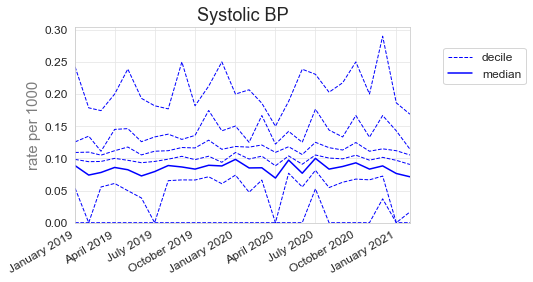

In [153]:
systolic_bp_df = drop_irrelevant_practices(data_dict['sentinel_measure_x'])

charts.deciles_chart(
    data_dict['sentinel_measure_x'],
    period_column="date",
    column="value",
    title="Systolic BP",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

example_code_dict = get_child_codes(systolic_bp_df)
childs_df = create_child_table(systolic_bp_df)
HTML(childs_df.to_html(index=False))

<a id="qrisk"></a>
### QRISK

In [ ]:
charts.deciles_chart(
    data_dict['qrisk'],
    period_column="date",
    column="value",
    title="QRISK",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

<a id="cholesterol"></a>
### Cholesterol

In [ ]:
charts.deciles_chart(
    data_dict['cholesterol'],
    period_column="date",
    column="value",
    title="Cholesterol",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

<a id="bilirubin"></a>
### Bilirubin

In [ ]:
charts.deciles_chart(
    data_dict['bilirubin'],
    period_column="date",
    column="value",
    title="Bilirubin",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

<a id="serum_tsh"></a>
### Serum TSH

In [ ]:
charts.deciles_chart(
    data_dict['serum_tsh'],
    period_column="date",
    column="value",
    title="Serum TSH",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

<a id="rbc_fbc"></a>
### RBC/FBC

In [ ]:
charts.deciles_chart(
    data_dict['rbc_fbc'],
    period_column="date",
    column="value",
    title="RBC/FBC",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

<a id="hba1c"></a>
### HBa1c

In [ ]:
charts.deciles_chart(
    data_dict['hba1c'],
    period_column="date",
    column="value",
    title="HBa1c",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

<a id="serum_sodium"></a>
### Serum Sodium

In [ ]:
charts.deciles_chart(
    data_dict['serum_sodium'],
    period_column="date",
    column="value",
    title="Serum Sodium",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);

<a id="asthma"></a>
### Asthma

In [ ]:
charts.deciles_chart(
    data_dict['asthma'],
    period_column="date",
    column="value",
    title="Asthma",
    ylabel="rate per 1000",
    show_outer_percentiles=False,
    show_legend=True,
);